### Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from urllib.request import urlretrieve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from jcopml.plot import plot_missing_value

### 1 . Data Preparation

In [3]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
save = urlretrieve(iris,'D:/iris.csv')
data = pd.read_csv(iris, sep=',')

In [4]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data.columns = attributes

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
sepal_width,149.0,3.051007,0.433499,2.0,2.8,3.0,3.3,4.4
petal_length,149.0,3.774497,1.759651,1.0,1.6,4.4,5.1,6.9
petal_width,149.0,1.205369,0.761292,0.1,0.3,1.3,1.8,2.5


Text(0.5, 1.0, 'Graph of Classes Data')

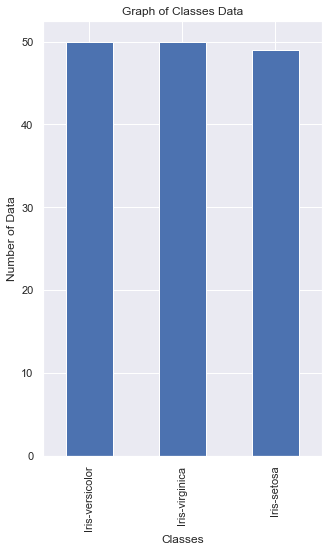

In [7]:
fig = plt.figure(figsize = (5, 8))
sns.set(style = "darkgrid")
data["class"].value_counts().plot(kind = "bar")

# Labeling the Y-axis
plt.ylabel("Number of Data")

# Labeling the X-axis
plt.xlabel("Classes")

# Give a title to the graph
plt.title("Graph of Classes Data")

### 2. Data Cleansing

,missing_value,%
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
class,0,0.0


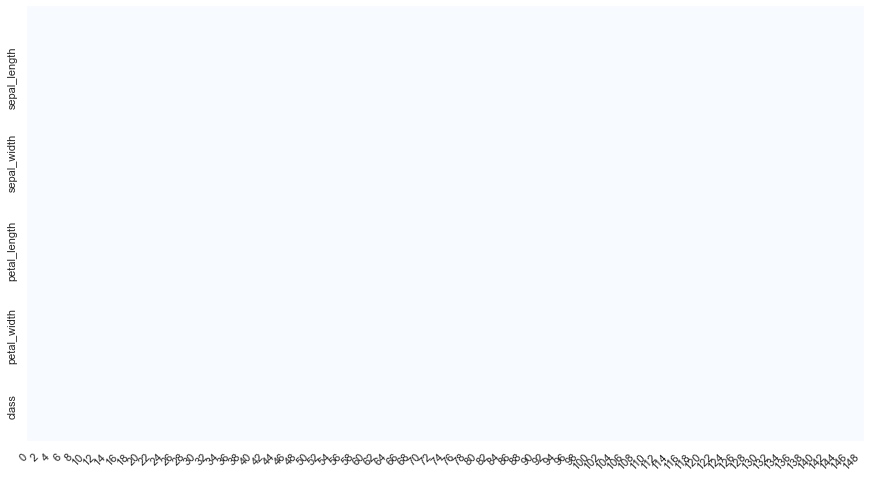

In [8]:
plot_missing_value(data, return_df=True)

#### Make object named encoder¶

In [9]:
encoder = LabelEncoder()

#### List column of categori and convert to numeric

In [10]:
categorical_data = ["class"]

In [11]:
for kolom in categorical_data:
    data[kolom] = encoder.fit_transform(data[kolom])

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


### 3. Spliting Data

In [13]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

### 4. Feature Scaling

In [15]:
np.random.seed(123)

In [16]:
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 5. Build Model using SVM Classifier

In [17]:
np.random.seed(123)

In [18]:
# Build Model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [19]:
# Predict and print classification report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91        15
           2       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



In [20]:
#Confusion matrix
cms = confusion_matrix(y_test,predictions)
cms

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 16]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Iris Dataset using SVC')

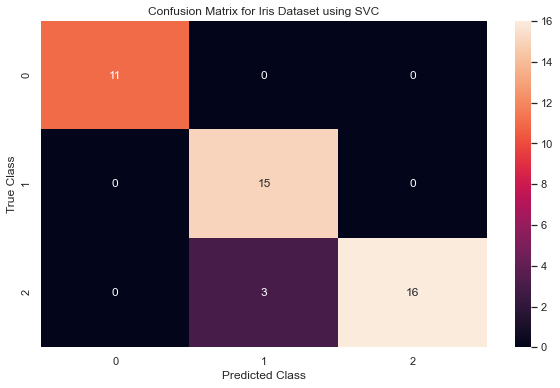

In [21]:
#Plotting confusion matrix

fig = plt.figure(figsize = (10, 6))
sns.heatmap(cms, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Iris Dataset using SVC")

#### SVM using Parameter Tuning

In [22]:
np.random.seed(123)

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma

[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C

[CV 4/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ..............C

In [23]:
#predict and print classification report
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [24]:
# confusion matrix
cmg = confusion_matrix(y_test,grid_predictions)
cmg

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 18]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Iris Dataset using Parameter Tuning')

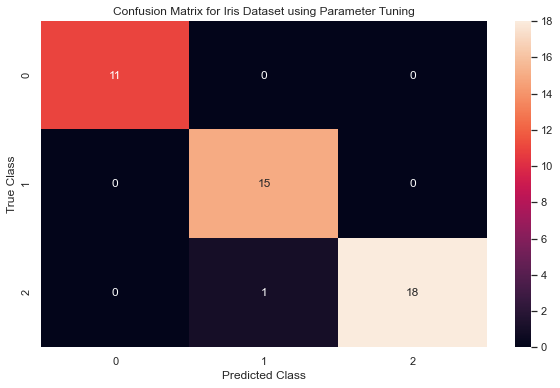

In [25]:
# Plotting confusion matrix

fig = plt.figure(figsize = (10, 6))
sns.heatmap(cmg, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Iris Dataset using Parameter Tuning")

#### SVM using Adaboost Algorithm

In [26]:
svc = SVC(probability = True, kernel='linear')

In [27]:
np.random.seed (123)

# Create adaboost classifier object
adaboost = AdaBoostClassifier(n_estimators = 5, base_estimator = svc,learning_rate = 1)

# Train Adaboost Classifer
model = adaboost.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [28]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [29]:
cmb = confusion_matrix(y_test,y_pred)
cmb

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 19]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Iris Dataset after Boosting')

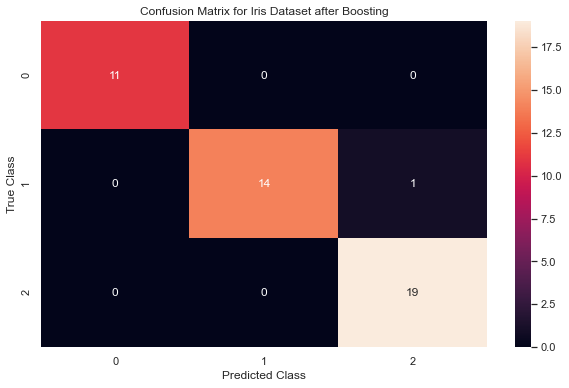

In [30]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cmb, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Iris Dataset after Boosting")

Berdasar hasil di atas, hasil akurasi yang diperoleh berbeda antara SVM Classifier(parameter kita yang menentukan), SVM Classifier dengan Parameter Tuning (program yang akan mencari parameter terbaik dari input yang dimasukkan), serta SVM Classifier dengan Adaboost Algorithm. Berikut hasil yang diperoleh :

1. SVM Classifier (42 Benar, 3 Salah, Akurasi 93%)
1. SVM Classifier with Parameter Tuning (44 Benar, 1 Salah, Akurasi 98%)
3. SVM Classifier with Adaboost Algorithm (44 Benar, 1 Salah, Akurasi 98%)

### 6. Build Model using Random Forest Classifier

In [31]:
# Build Model Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
#Predict and print classification report

y_preds = rf.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [33]:
#Confusion matrix
cmr = confusion_matrix(y_test,y_preds)
cmr

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 17]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Iris Dataset using Random Forest')

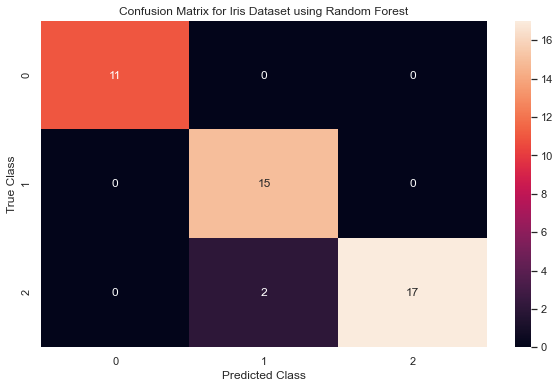

In [34]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cmr, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Iris Dataset using Random Forest")

#### Random Forest using Parameter Tuning

In [35]:
np.random.seed(123)

# defining parameter range
parameter = {'n_estimators':[5,10,15], 
              'criterion':['gini','entropy']} 
  
grid_rf = GridSearchCV(RandomForestClassifier(), parameter, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_rf.fit(X_train, y_train)

# print best parameter after tuning
print(grid_rf.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_rf.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................criterion=gini, n_estimators=5; total time=   0.0s
[CV 2/5] END .................criterion=gini, n_estimators=5; total time=   0.0s
[CV 3/5] END .................criterion=gini, n_estimators=5; total time=   0.0s
[CV 4/5] END .................criterion=gini, n_estimators=5; total time=   0.0s
[CV 5/5] END .................criterion=gini, n_estimators=5; total time=   0.0s
[CV 1/5] END ................criterion=gini, n_estimators=10; total time=   0.0s
[CV 2/5] END ................criterion=gini, n_estimators=10; total time=   0.0s
[CV 3/5] END ................criterion=gini, n_estimators=10; total time=   0.0s
[CV 4/5] END ................criterion=gini, n_estimators=10; total time=   0.0s
[CV 5/5] END ................criterion=gini, n_estimators=10; total time=   0.0s
[CV 1/5] END ................criterion=gini, n_estimators=15; total time=   0.0s
[CV 2/5] END ................criterion=gini, n_es

In [36]:
#predict and print classification report
grid_rf_predictions = grid_rf.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.93      0.90        15
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [37]:
# confusion matrix
cmgr = confusion_matrix(y_test,grid_rf_predictions)
cmgr

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 17]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Iris Dataset using Parameter Tuning')

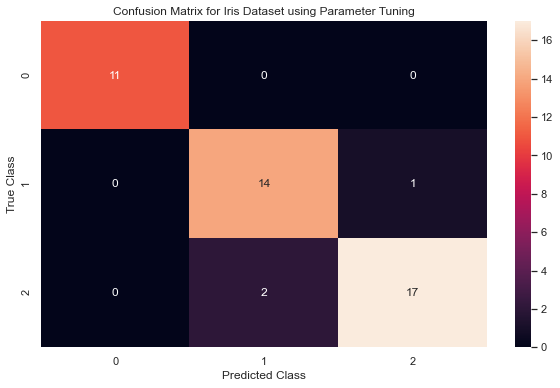

In [38]:
#Plotting confusion matrix

fig = plt.figure(figsize = (10, 6))
sns.heatmap(cmgr, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Iris Dataset using Parameter Tuning")

#### Random Forest using Adaboost

In [39]:
np.random.seed (123)

# Create adaboost classifier object
adaaboost = AdaBoostClassifier(n_estimators = 5, base_estimator = rf,learning_rate = 1)

# Train Adaboost Classifer
model = adaaboost.fit(X_train, y_train)

#Predict the response for test dataset
y_rf_pred = model.predict(X_test)

In [40]:
# Print classification report
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [41]:
cmbr = confusion_matrix(y_test,y_rf_pred)
cmbr

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 17]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Iris Dataset after Boosting')

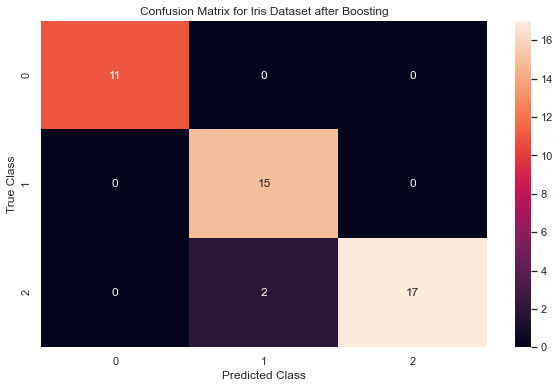

In [42]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cmbr, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Iris Dataset after Boosting")

Berdasar hasil di atas, hasil akurasi yang diperoleh berbeda antara Random Forest Classifier(parameter kita yang menentukan), Random Forest  Classifier dengan Parameter Tuning (program yang akan mencari parameter terbaik dari input yang dimasukkan), serta Random Forest  Classifier dengan Adaboost Algorithm. Berikut hasil yang diperoleh :

1. Random Forest  Classifier (43 Benar, 2 Salah, Akurasi 96%)
1. Random Forest  Classifier with Parameter Tuning (42 Benar, 3 Salah, Akurasi 93%)
3. Random Forest  Classifier with Adaboost Algorithm (43 Benar, 2 Salah, Akurasi 96%)

Jadi, secara keseluruhan hasilnya adalah Random Forest Classifier lebih baik tingkat akurasinya daripada SVM Classifier, meskipun pada Random Forest tidak diterapkan Parameter Tuning atau Adaboost Algortihm. Namun, pada algoritma SVM untuk memperoleh tingkat akurasi yang lebih baik disarankan untuk memakai optimisasi parameter (Parameter Tuning) atau menerapkan boosting dengan Adaboost Algorithm.